<a href="https://colab.research.google.com/github/WinetraubLab/3D-segmentation/blob/05-02/3D-segmentation.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>
<a href="https://github.com/WinetraubLab/3D-segmentation/blob/05-02/3D-segmentation.ipynb" target="_blank">
  <img src="https://img.shields.io/badge/view%20in-GitHub-blue" alt="View in GitHub"/>
</a>

#   Segmentation with MedSAM2
Use MedSAM2 to automatically detect classes and segment a stack of OCT images.

Make sure to use a GPU runtime (T4 on Colab).
> **Runtime → Change runtime type → GPU**  

INPUTS:
1. Roboflow dataset of OCT images with annotations. Each annotation mask is a complete segmentation of one instance of the specified class.
2. Folder containing OCT images to be segmented using this script.

OUTPUTS: A folder containing segmentation mask images for each frame.


## Setup and Dependencies

In [ ]:
!git clone -b 05-02 https://github.com/WinetraubLab/3D-segmentation.git 

!git clone https://github.com/bowang-lab/MedSAM2.git
%cd MedSAM2
!sh download.sh
%cd ..

In [ ]:
# @title Configuration and Dataset
import os
from roboflow import Roboflow
from google.colab import files
from google.colab import drive
from 3D-segmentation import segment, masks

# LOAD ROBOFLOW DATA
# @markdown Enter the directory containing your image stack to segment:
images_to_segment_path = "" # @param {type:"string"}

# @markdown Enter your Roboflow API key, and details of the dataset with your annotated images:
your_api_key = "API_KEY"  # @param {type:"string"}
workspace_name = "yolab-kmmfx"  # @param {type:"string"}
project_name = "vol1_2"  # @param {type:"string"}

if not os.path.isdir(images_to_segment_path):
    raise NotADirectoryError(f"‘{images_to_segment_path}’ is not a valid directory")

rf = Roboflow(api_key=your_api_key)
project = rf.workspace(workspace_name).project(project_name)

# Automatically download the latest version
versions = project.versions()
latest_version = max(versions, key=lambda v: v.version)
dataset = latest_version.download("coco-segmentation")

# Set global paths
ANN_BASE_PATH = dataset.location
OCT_BASE_PATH = images_to_segment_path

VIDEO_DIR = f"{OCT_BASE_PATH}/clahe/"
COCO_PATH = f"{ANN_BASE_PATH}/test/_annotations.coco.json"

MODEL_CONFIG = "configs/sam2.1_hiera_t512.yaml"
MODEL_CHECKPOINT = "checkpoints/MedSAM2_latest.pt"

FORWARD_OUTDIR = f"{ANN_BASE_PATH}/out_forwards/"
BACKWARD_OUTDIR = f"{ANN_BASE_PATH}/out_backwards/"
os.makedirs(FORWARD_OUTDIR, exist_ok=True)
os.makedirs(BACKWARD_OUTDIR, exist_ok=True)

drive.mount('/content/drive')


In [ ]:
# @title Run model

orig_images_path = f"{ANN_BASE_PATH}/test/"
class_ids = segment.run_inference(orig_images_path, VIDEO_DIR, COCO_PATH, MODEL_CONFIG, MODEL_CHECKPOINT, OCT_BASE_PATH, FORWARD_OUTDIR, BACKWARD_OUTDIR)

In [10]:
# @title Download individual class segmentations

## Change c, uncomment the below code in the cell, and run this code cell to download individual class segmentation

# c = 1  # c = class number
# folder_path = f"{OCT_BASE_PATH}/merged_predictions_class_{c}/"  # change this to your folder path
# zip_path = f"/content/merged_predictions_class_{c}.zip"

# Zip the folder
# shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)

# files.download(zip_path)


Skipping class 3 — directory not found: /content/MedSAM2/vol1_2-2/merged_predictions_class_3


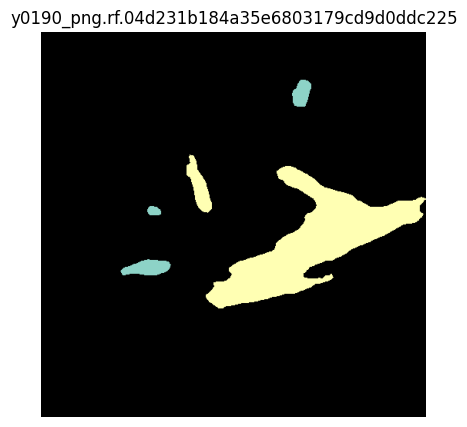

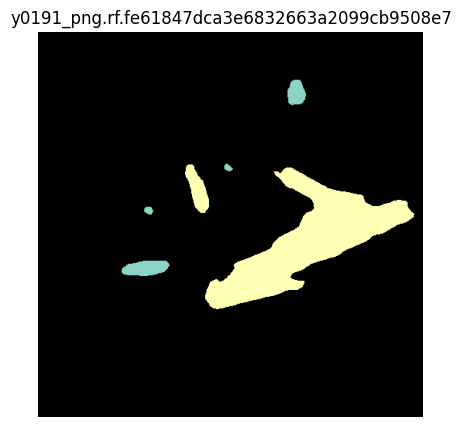

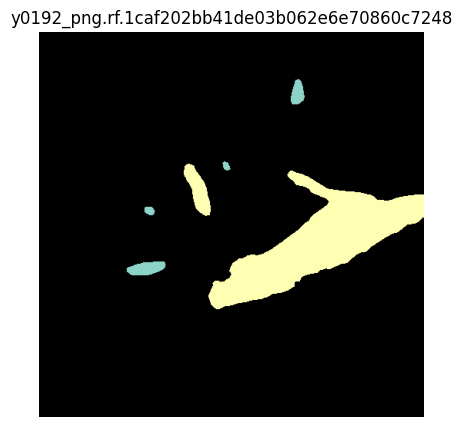

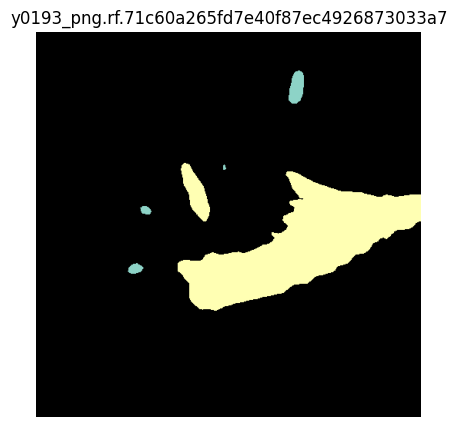

In [ ]:
# @title Combine class masks

mask_dirs = [f'{OCT_BASE_PATH}/merged_predictions_class_{class_id}' for class_id in class_ids]
output_dir = '/content/final_merged'

# combine_class_masks(mask_dirs, [["none","none"], ["0064", "0068"], ["0178","0240"]], output_dir=output_dir, show=True)
masks.combine_class_masks(mask_dirs, None, output_dir=output_dir, show=True)


In [19]:
import shutil
from google.colab import files

folder_path = '/content/final_merged'
zip_path = "/content/final_merged_segmentations.zip"

# Zip the folder
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)

# Download the zip file
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>